# CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

#### Dataset

122 Classes

In [ ]:
!tar -xf /content/drive/MyDrive/OCR/all.tar
!rm -r "/content/augmented+original scanned/100"
!rm -r "/content/augmented+original scanned/76"

In [3]:
img_height = 64
img_width = 64
dim = 1
batch_size = 64
shape=(img_height,img_width)
input_shape=(img_height,img_width,dim)

In [ ]:
train_generator = image_dataset_from_directory(
    '/content/augmented+original scanned',
    image_size=shape,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='categorical',
    shuffle=True,
    subset='training',
    seed=123,
    validation_split=0.2
)

val_generator = image_dataset_from_directory(
    '/content/augmented+original scanned',
    image_size=shape,
    batch_size=batch_size,
    color_mode='grayscale',
    label_mode='categorical',
    shuffle=True,
    subset='validation',
    seed=123,
    validation_split=0.2
)

Found 502228 files belonging to 122 classes.
Using 401783 files for training.
Found 502228 files belonging to 122 classes.
Using 100445 files for validation.


#### Model Architecture

In [8]:
model = Sequential()
model.add(Conv2D(24,kernel_size=3,activation='relu',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(24,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(24,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(48,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(48,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(48,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(122, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

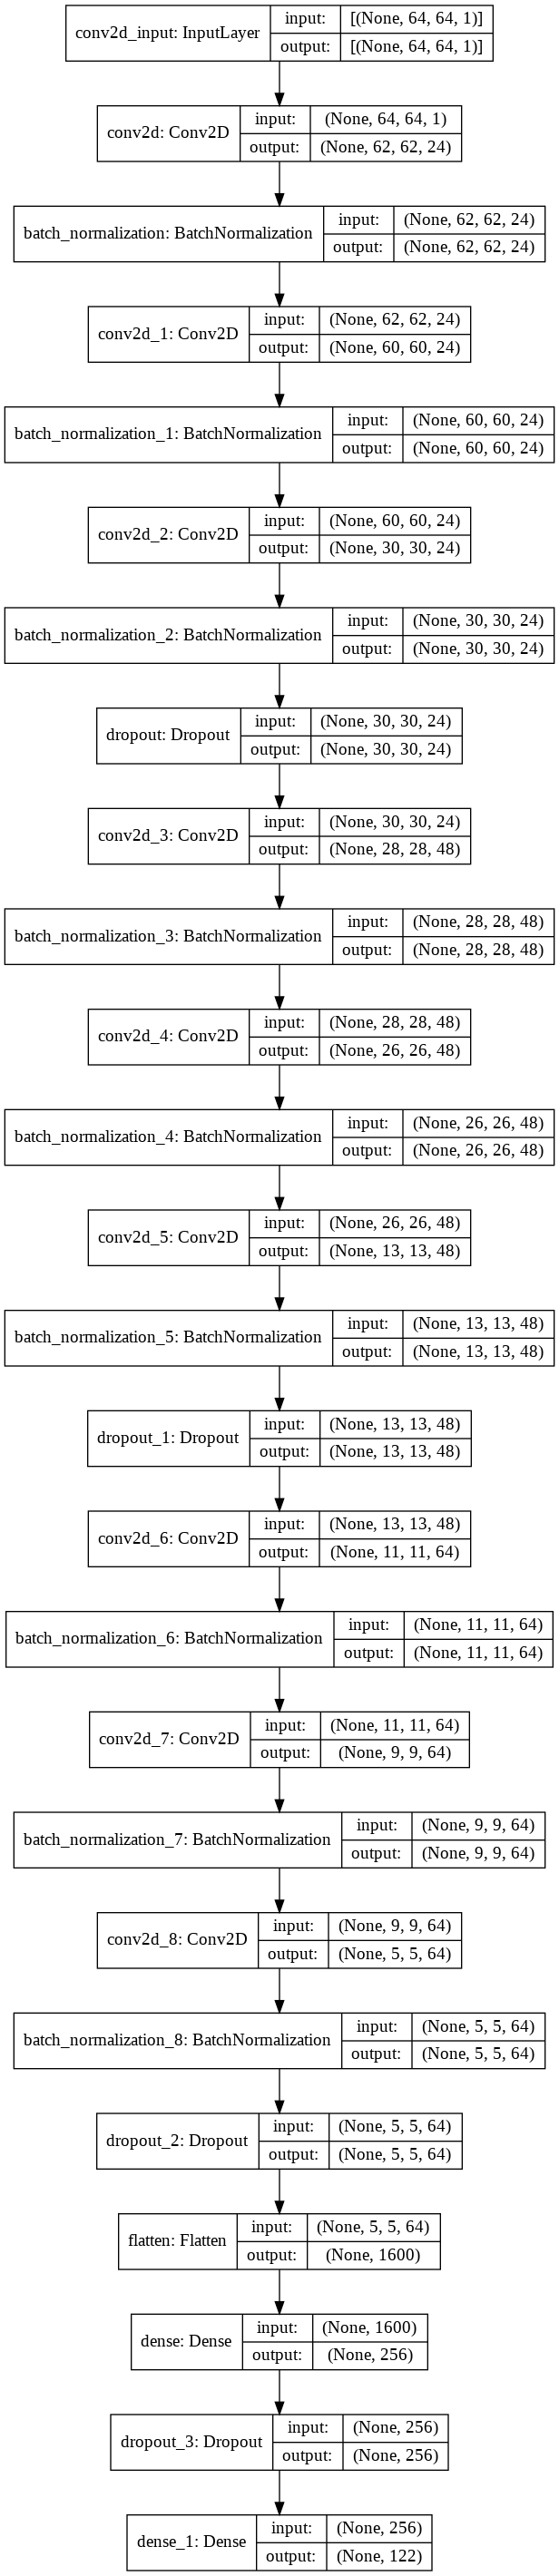

In [12]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
)

In [ ]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 24)        240       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 24)        96        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 24)        5208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 24)        96        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 24)        14424     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 24)        96        
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 24)        0

#### Callbacks

In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy',
                                             factor=0.5,
                                             patience=3,
                                             verbose=1,
                                             min_lr=0.00001
          )

early_stopping = EarlyStopping(monitor='loss',patience=10)

#### Training and Model Serializing

In [ ]:
epochs=20
history = model.fit(
  train_generator,
  epochs=epochs,
  callbacks = [early_stopping,annealer],
  validation_data=val_generator,
)
model.save("/content/drive/MyDrive/OCR/mycnn/bn")

Epoch 1/20
6278/6278 [==============================] - 213s 29ms/step - loss: 1.9138 - accuracy: 0.5332 - val_loss: 29.9728 - val_accuracy: 0.0607
Epoch 2/20
6278/6278 [==============================] - 172s 27ms/step - loss: 0.2711 - accuracy: 0.9243 - val_loss: 24.7296 - val_accuracy: 0.1187
Epoch 3/20
6278/6278 [==============================] - 167s 27ms/step - loss: 0.1831 - accuracy: 0.9495 - val_loss: 11.2808 - val_accuracy: 0.2619
Epoch 4/20
6278/6278 [==============================] - 174s 28ms/step - loss: 0.1446 - accuracy: 0.9605 - val_loss: 0.6002 - val_accuracy: 0.8242
Epoch 5/20
6278/6278 [==============================] - 172s 27ms/step - loss: 0.1245 - accuracy: 0.9664 - val_loss: 1.0376 - val_accuracy: 0.7226
Epoch 6/20
6278/6278 [==============================] - 170s 27ms/step - loss: 0.1117 - accuracy: 0.9701 - val_loss: 3.2188 - val_accuracy: 0.6297
Epoch 7/20
6278/6278 [==============================] - 177s 28ms/step - loss: 0.1017 - accuracy: 0.9726 - val_loss

In [11]:
model = tf.keras.models.load_model('/content/drive/MyDrive/data/bn')

#### Getting Class Names

In [ ]:
class_index = train_generator.class_names

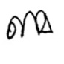

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/augmented+original scanned/101/1110_2.jpg'
    , color_mode='grayscale', target_size=(64,64),interpolation='nearest')

h = []
array = tf.keras.preprocessing.image.img_to_array(img)
h.append(array)
h = np.array(h)

img

In [ ]:
class_index[model.predict(h).argmax()]

'101'

#### Testing

In [ ]:
import cv2
from pathlib import Path
from sklearn.utils import Bunch
import numpy as np

def load_images(container_path, dimension=(64, 64)): 
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Malayalam Character classification dataset"
    images = []
    flat_data = []
    target = []
    Sreq = dimension[0]
    for i, direc in enumerate(folders):
        j = 0
        for image_path in direc.iterdir():
            image = cv2.imread(str(image_path), 0)
            img_resized = cv2.resize(image, None, fx=Sreq/image.shape[0], fy=Sreq/image.shape[1],interpolation=cv2.INTER_CUBIC)
            if not (img_resized.shape == (64,64)):
              continue
            images.append(img_resized)
            target.append(i)
            j += 1
            if j == 1000:
              break
        print(f'Folder {i+1} of {len(folders)} Retreived')
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=images,
                 target=target,
                 target_names=categories,
                 DESCR=descr)

In [ ]:
dataset = load_images('/content/augmented+original scanned')

Folder 1 of 122 Retreived
Folder 2 of 122 Retreived
Folder 3 of 122 Retreived
Folder 4 of 122 Retreived
Folder 5 of 122 Retreived
Folder 6 of 122 Retreived
Folder 7 of 122 Retreived
Folder 8 of 122 Retreived
Folder 9 of 122 Retreived
Folder 10 of 122 Retreived
Folder 11 of 122 Retreived
Folder 12 of 122 Retreived
Folder 13 of 122 Retreived
Folder 14 of 122 Retreived
Folder 15 of 122 Retreived
Folder 16 of 122 Retreived
Folder 17 of 122 Retreived
Folder 18 of 122 Retreived
Folder 19 of 122 Retreived
Folder 20 of 122 Retreived
Folder 21 of 122 Retreived
Folder 22 of 122 Retreived
Folder 23 of 122 Retreived
Folder 24 of 122 Retreived
Folder 25 of 122 Retreived
Folder 26 of 122 Retreived
Folder 27 of 122 Retreived
Folder 28 of 122 Retreived
Folder 29 of 122 Retreived
Folder 30 of 122 Retreived
Folder 31 of 122 Retreived
Folder 32 of 122 Retreived
Folder 33 of 122 Retreived
Folder 34 of 122 Retreived
Folder 35 of 122 Retreived
Folder 36 of 122 Retreived
Folder 37 of 122 Retreived
Folder 38 

In [ ]:
dataset.data = dataset.data.reshape((122000,64,64,1))

In [ ]:
y_pred = model.predict(dataset.data)
y_pred = np.argmax(y_pred,axis=-1)

y_index = [class_index[i] for i in y_pred]
y_true = [dataset.target_names[i] for i in dataset.target]

#### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true,y_index))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1000
          10       1.00      0.99      0.99      1000
         101       0.99      0.99      0.99      1000
         102       1.00      1.00      1.00      1000
         103       1.00      1.00      1.00      1000
         104       0.99      0.98      0.98      1000
         105       0.98      0.99      0.99      1000
         106       1.00      1.00      1.00      1000
         107       0.73      0.96      0.83      1000
         108       0.97      0.99      0.98      1000
         109       1.00      0.98      0.99      1000
          11       0.99      1.00      1.00      1000
         110       0.99      1.00      1.00      1000
         111       1.00      0.98      0.99      1000
         112       0.99      0.96      0.97      1000
         113       0.99      0.98      0.99      1000
         114       0.97      1.00      0.98      1000
         115       0.99    

#### Confusion Matrix

In [ ]:
confusion_matrix(y_true,y_index)

array([[997,   0,   0, ...,   0,   0,   0],
       [  0, 989,   0, ...,   0,   0,   0],
       [  0,   0, 990, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 998,   0,   0],
       [  0,   0,   0, ...,   0, 987,   0],
       [  0,   0,   1, ...,   0,   1, 991]])